# Конспект по книге "Python для сложных задач" Дж. Вандер Плас

## Глава 3. Библиотека Pandas

Библиотека Pandas является надстройкой над билиотекой NumPy (для её установки необходимо иметь уже установленную NumPy), предназначенную для работы с более реальными неабстрактными данными - неоднородными именованными структурами, пропущенными значениями. Для этой цели Pandas предоставляет два основых класса: pd.Series и pd.DataFrame.

In [1]:
import numpy as np
import pandas as pd

### Объект pd.Series

Series - одномерный проиндексированный массив. Разница от массива NumPy в том, что индексом может служить любой массив любого типа данных, в том числе неупорядоченный. 

В объектах Series имеется 2 индекса: явный и неявный. Неявный индекс - сдандартный индекс для массива (0, 1, 2...). Явный - индекс, заданный пользователем. Обращаться к Series можно по обоим индексам, в том числе строить срезы и т.п.

Ниже представлны различные способы создания pd.Series

In [2]:
srs = pd.Series(['a1', 'a2', 'a3']) #индекс по умолчанию
srs

0    a1
1    a2
2    a3
dtype: object

In [3]:
srs = pd.Series(data=['a1','a2','a3','a4','a5'], index=['a','b','c','d','e'])
srs

a    a1
b    a2
c    a3
d    a4
e    a5
dtype: object

In [4]:
population_dict = {'California': 38332521,
     'Texas': 26448193,
     'New York': 19651127,
     'Florida': 19552860,
     'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [5]:
srs.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [6]:
srs.values

array(['a1', 'a2', 'a3', 'a4', 'a5'], dtype=object)

In [7]:
srs[1]

'a2'

In [8]:
srs[1:4] #срез по неявному индексу

b    a2
c    a3
d    a4
dtype: object

In [9]:
srs['b':'e'] #срез по явному индексу

b    a2
c    a3
d    a4
e    a5
dtype: object

### Объект pd.DataFrame

DataFrame - обобщение двумерного индексированного массива. Его можно представлять как последователность колонок данных, выровненных по одному индексу.

Ниже представлены способы создать DataFrame:

In [10]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [11]:
states = pd.DataFrame({'population': population,'area': area}) #создание из словаря объектов Series
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [12]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [13]:
states.columns

Index(['population', 'area'], dtype='object')

In [14]:
pop = pd.DataFrame(population)
pop

,0
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [15]:
pop.columns = ['population']
pop

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [16]:
data = [{'a': i, 'b': 2 * i} for i in range(3)] #создание из списка словарей
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [17]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}]) #если каких-либо ключей нет, они заполнятся недостающими данными

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [18]:
arr = np.random.randint(0, 10, (2,2))
data = pd.DataFrame(arr, index=['10','11'], columns=['first','second']) #создание из массива
data

,first,second
10,9,3
11,2,9


### Объект Index библиотеки Pandas

Если посмотреть на тип индекса Series или Dataframe, то увидим, что он представляет из себя не массив, как стоило бы предпологать, а специальный объект Index.

In [19]:
data.index

Index(['10', '11'], dtype='object')

Index можно представлять как неизменяемый массив или как упорядоченное мультимножество:

In [20]:
#data.index[1] = 99 - приведёт к ошибке, т.к. Index - неизменяемый массив

In [21]:
ind = data.index
print(ind.size, ind.shape, ind.ndim, ind.dtype) #как и у массивов, у индексов есть эти свойства

2 (2,) 1 object


Для индексов можно выполнять операции, как над множествами (set):

In [22]:
ind1 = pd.Index([1, 2, 3, 4, 5, 6])
ind2 = pd.Index([1, 3, 5])

print(ind1.intersection(ind2))
print(ind1.join(ind2))
print(ind1.symmetric_difference(ind2))

Int64Index([1, 3, 5], dtype='int64')
Int64Index([1, 2, 3, 4, 5, 6], dtype='int64')
Int64Index([2, 4, 6], dtype='int64')


### Выборка данных из объекта Series

Для объекта Series справедливо индексирование по явному и неявному индексу:

In [272]:
data = pd.Series([0, 0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'b', 'c', 'd'])
data

a    0.00
b    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [24]:
data['a'], type(data['a'])

(0.0, numpy.float64)

In [25]:
data['b'], type(data['b'])

(b    0.25
 b    0.50
 dtype: float64,
 pandas.core.series.Series)

Срезы объектов Series и DataFrame обладают особенностью: в срезах по неявному индексу отбрасывается верхняя граница(как в срезах билбиотеки NumPy), а в срезах по явному индексу, верхняя граница вклюючается:

In [26]:
data[1:4]

b    0.25
b    0.50
c    0.75
dtype: float64

In [27]:
data[::2]

a    0.0
b    0.5
d    1.0
dtype: float64

In [28]:
data['b':'d']

b    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [29]:
data1 = pd.Series([0, 0.25, 0.5, 0.75, 1.0], index=[2, 3, 4, 5, 6])
data1[2:4] #используется неявный индекс

4    0.50
5    0.75
dtype: float64

Для устранения подобной двузначности существуют методы loc, iloc, ix.

loc - выполняет инексацию по явному индексу

iloc - выполняет индексацию по неявному индексу

ix - позволяет в рамках одного среза использовать и явную и неявную индексацию (нужно для DataFrame) НЕ ПОДДЕРЖИВЕТСЯ С ВЕРСИИ 0.20!!!

In [30]:
data.loc['b':'d']

b    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [31]:
data.iloc[1:4]

b    0.25
b    0.50
c    0.75
dtype: float64

In [289]:
data = pd.DataFrame(data=np.random.randint(1, 10, (10, 4)))
data.iloc[1:5, 1:3]

,1,2
1,1,1
2,6,2
3,7,2
4,5,5


Также Series поддерижвает маскирование и прихотливую индексацию:

In [32]:
data[data > 0.25]

b    0.50
c    0.75
d    1.00
dtype: float64

In [33]:
data[['b', 'a', 'd']]

b    0.25
b    0.50
a    0.00
d    1.00
dtype: float64

### Выборка данных из объектов DataFrame

In [34]:
area = pd.Series({'California': 423967, 'Texas': 695662,
             'New York': 141297, 'Florida': 170312,
             'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
             'New York': 19651127, 'Florida': 19552860,
             'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


Все способы выборок, доступные для Series доступны и для DataFrame. Также можно использовать ix для индексации по явному и неявному индексу одновременно. Также, обратившись по имени колонки можно получить объект Series, соответствующий нужному столбцу:

In [35]:
data['pop']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: pop, dtype: int64

In [36]:
data.pop

<bound method DataFrame.pop of               area       pop
California  423967  38332521
Texas       695662  26448193
New York    141297  19651127
Florida     170312  19552860
Illinois    149995  12882135>

In [37]:
data['Texas':'Florida']['area']

Texas       695662
New York    141297
Florida     170312
Name: area, dtype: int64

In [38]:
data.loc['Texas':'Florida']

,area,pop
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860


In [39]:
data.iloc[1:3]

,area,pop
Texas,695662,26448193
New York,141297,19651127


Также можно как в словаре присвоить несуществующей колонке значения и она появится в DataFrame:

In [40]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [41]:
data[data['density'] > 90]

,area,pop,density
California,423967,38332521,90.413926
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


df.values - это массив NumPy, так что для него справедливы все операции над массивами. Кроме того, при транспонировании это массива индексы колонок и строк поменются местами (да, названия колонок - это тоже индексы):

In [42]:
data.columns

Index(['area', 'pop', 'density'], dtype='object')

In [43]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [44]:
data.iloc[1, 1] = 666
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,666,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [45]:
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,695662.00000,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,666.00000,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,38.01874,1.390767e+02,1.148061e+02,8.588376e+01


### Операции над данными в библиотеке Pandas

Операции над данными для объектов Series и DataFrame очень похожи на операции над массивами NumPy. Разница состоит в том, что в Pandas данные индексированы. Поэтому при применении операций между объектами DataFrame и Series они выравниваются по индексу относительно друг друга, что означает сохранение контекста данных после применения операции.

In [46]:
df = pd.DataFrame(np.random.randint(0, 10, (3, 4)), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,1,2,4,4
1,0,0,6,6
2,1,7,0,7


Т.к. данные объектов Pandas представляют из себя массивы NumPy, то все стандартные операции этой библиотеки применимы к ним с сохранением индекса:

In [47]:
np.tan(np.exp(df) / np.pi)

,A,B,C,D
0,1.173979,-1.008405,-9.929525,-9.929525
1,0.329515,0.329515,-0.410968,-0.410968
2,1.173979,0.367741,0.329515,0.367741


При выполнении бинарных операций, происходит выравнивание данных по индексу и по столбцам (для DataFrame). При отсутствии в одном из операндов индекса или столбца, он заполняется отсутствующими данными (Not a Number). Получающие в итоге объекты содержат объединение множеств индексов и столбцов:

In [48]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127}, name='population')
area, population

(Alaska        1723337
 Texas          695662
 California     423967
 Name: area, dtype: int64,
 California    38332521
 Texas         26448193
 New York      19651127
 Name: population, dtype: int64)

In [49]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [50]:
A = pd.DataFrame(np.random.randint(0, 20, (2, 2)), columns=list('AB'))
B = pd.DataFrame(np.random.randint(0, 10, (3, 3)), columns=list('BAC'))
A, B

(    A  B
 0  18  5
 1   9  8,
    B  A  C
 0  0  3  4
 1  1  6  8
 2  6  0  1)

In [51]:
A + B

,A,B,C
0,21.0,5.0,NaN
1,15.0,9.0,NaN
2,NaN,NaN,NaN


При вызове операции при помощи метода можно указать, как заполнить отсутствующие значения в ОПЕРАНДАХ:
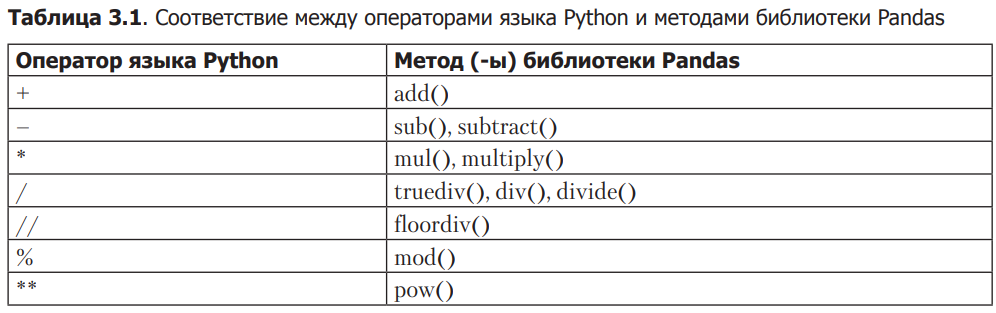

In [52]:
A.add(B, fill_value = 0)

,A,B,C
0,21.0,5.0,4.0
1,15.0,9.0,8.0
2,0.0,6.0,1.0


Выволнение операций между DataFrame и Series по умолчанию выполняется построчно, но также можно указать нужную ось для операции:

In [53]:
df = pd.DataFrame(np.random.randint(10, size=(3, 4)), columns=list('QRST'))
ser = pd.Series([1, 2, 3, 4], index = list('QRST'))
df, ser

(   Q  R  S  T
 0  2  5  3  1
 1  3  8  7  5
 2  5  9  0  8,
 Q    1
 R    2
 S    3
 T    4
 dtype: int64)

In [54]:
df - ser

,Q,R,S,T
0,1,3,0,-3
1,2,6,4,1
2,4,7,-3,4


In [55]:
ser = pd.Series([1, 2, 3])
ser

0    1
1    2
2    3
dtype: int64

In [56]:
df.subtract(ser, axis=0)

,Q,R,S,T
0,1,4,2,0
1,1,6,5,3
2,2,6,-3,5


### Обработка отсутствующих значений

Для обозначения отсутствующих значений в библиотеке Pandas предусмотрены 2 варианта: None и NaN.

#### Объект None

None - объект типа object языка Python. Это означает, что все массивы, содержащие в себе None должны быть типа object. В связи с этим, все операции по работе с массивами этого типа будут выполняться с накладными разсходами (причём довольно большими по времени). Для массивов типа object даже не определены операции сложения и т.п.

In [57]:
arr = np.array([1, None, 3, 4])
ser

0    1
1    2
2    3
dtype: int64

In [58]:
#arr + 1 - ошибка

#### Тип NaN

NaN - специально выделенное значние с плавающей точкой. Таким образом, все массивы, содержащие NaN приводятся к типу float.

In [59]:
arr = np.array([1, np.nan, 3, 4])
arr.dtype

dtype('float64')

При выполнении операций, тип NaN преобразует всё, что с ним "прикасается". Поэтому функции агрегирования могут не давать результата:

In [60]:
np.nan + 100

nan

In [61]:
arr.sum()

nan

В библиотеке Pandas есть встроенное преобразование от None в NaN и обратно. Библиотека сама преобрзует их в зависимости от контекста массива (его типа). Если массив числовой, то None автоматически станет NaN. А вот если тип массива object (строки, например, являются object'ами), то произойдёт понижающее преоразование NaN в object, но NaN останется NaN'ом:

In [62]:
ser = pd.Series(['a', 'b', np.nan, 'd'])
ser

0      a
1      b
2    NaN
3      d
dtype: object

In [63]:
ser  = pd.Series([1, 2, None, 4])
ser

0    1.0
1    2.0
2    NaN
3    4.0
dtype: float64

#### Работа с пустыми значениями в Pandas

В Pandas есть ряд удобных функций для работу с пустыми значениями:
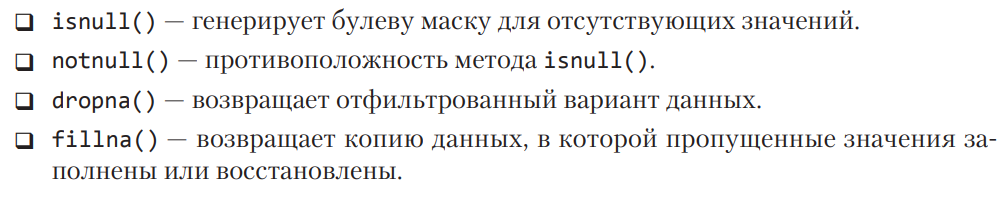

In [64]:
data = pd.Series([1, np.nan, 'hello', None])
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [65]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [66]:
data.notnull()

0     True
1    False
2     True
3    False
dtype: bool

In [67]:
data[data.notnull()]

0        1
2    hello
dtype: object

In [68]:
data.dropna()

0        1
2    hello
dtype: object

Для объектов DataFrame у метода dropna есть аргументы для более удобного удаления:

In [69]:
df = pd.DataFrame([[1, np.nan, 2],
                 [2, 3, 5],
                 [np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


По умолчанию dropna() отбрасывает все строки, в которых присутствует хотя бы одно пустое значение:

In [70]:
df.dropna()

,0,1,2
1,2.0,3.0,5


Для более точного удаления у этого метода есть параметры:

axis - по какой оси смотреть критерии удаления

how - удалить строки/столбцы, где есть хоть одно null значение (со значением 'any') или в которых все занчения null (со значением 'all')

thresh - позволяет указать минимальное количество непустых значений, при котором строка/столбец не отбрасываются.

In [71]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [72]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [73]:
df.dropna(axis=1, how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [74]:
df.dropna(thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


При заполнении методом fillna можно указать значение, которым буду заполнены null, а также можно выбрать алгоритм автоматического заполнение и ось по которой будет происходить автоматическое заполнение:

In [75]:
df.fillna(0)

,0,1,2,3
0,1.0,0.0,2,0.0
1,2.0,3.0,5,0.0
2,0.0,4.0,6,0.0


In [76]:
df.fillna(method='bfill', axis=1) #заполенение по направлению назад - заполняет следующим значением, если оно есть

,0,1,2,3
0,1.0,2.0,2.0,NaN
1,2.0,3.0,5.0,NaN
2,4.0,4.0,6.0,NaN


In [77]:
df.fillna(method='ffill',axis=1) #заполенение по направлению вперёд

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


### Иерархическая индексация

Иногда хочется хранить данные, проиндексированные сразу по нескольким параметрам, например город и год и население в качесстве данных. Для этого существуют объекты Panel и Panel4d, предоставляющие функционал аналогичный DataFrame, но для трёхмерных и четырёхмерных объектов.

Однако, есть способ проще и удобнее - объекты MultiIndex, дающие возможность индексировать (но не хранить в качестве данных) данные по нескольким измерениям:

In [78]:
multi = pd.MultiIndex.from_tuples([('California', 2000), ('California', 2010), ('New York', 2000), 
                                  ('New York', 2010), ('Texas', 2000), ('Texas', 2010)])
multi

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [79]:
populations = [33871648, 37253956, 18976457, 19378102, 20851820, 25145561]
ser = pd.Series(populations, index=multi)
ser

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

К мультииндексированному объекту можно обращаться по индексу его нескольких измерений:

In [80]:
ser[:, 2000]

California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [81]:
pop = pd.DataFrame(ser, columns=['pop'])
pop['u18'] = pd.Series([9267089, 9284094, 4687374, 4318033, 5906301, 6879014], index=multi)
pop

pop      u18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

Мультииндекс всегда можно "разобрать", т.е. представить его в виде колонок данных, и наоборот, но тогда вылазит мультииндекс по другому измерернию (если это объект Series, то он добалением ещё одного измерения превращается просто в DataFrame):

In [82]:
pop.unstack()

pop                u18         
                2000      2010     2000     2010
California  33871648  37253956  9267089  9284094
New York    18976457  19378102  4687374  4318033
Texas       20851820  25145561  5906301  6879014

In [83]:
perc = (pop['u18']/pop['pop']).unstack()
perc

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


#### Создание мультииндексов

In [84]:
#передача в конструктор Series или DataFrame более одного списка индексов
df = pd.DataFrame(np.random.rand(4, 2), index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]], columns=['data1', 'data2'])
df

data1     data2
a 1  0.405422  0.626790
  2  0.567988  0.016275
b 1  0.482600  0.126069
  2  0.124144  0.165910

In [85]:
#передача в конструктор Series или DataFrame словаря в с кортежами в качестве ключей (система автоматически создаст в таком случае мультииндекс)
data = {('California', 2000): 33871648,
     ('California', 2010): 37253956,
     ('Texas', 2000): 20851820,
     ('Texas', 2010): 25145561,
     ('New York', 2000): 18976457,
     ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

Также можно явлно создать объект мултииндекса:

In [86]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [87]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [88]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]]) #из декартового произведения

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [89]:
pd.MultiIndex(levels=[['a', 'b'], [1, 2]], codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

Также колонкам мультииндексов можно давать названия при создании мультииндекса или постфактум, таким образом не лишаясь контекста мультииндексов:

In [90]:
pop

pop      u18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [91]:
pop.index.names = ['State', 'Year']
pop

pop      u18
State      Year                   
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

Как и говорилось ранее, мультииндексами могут облать и столбцы:

In [92]:
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]], names=['year', 'visit'])

columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']], names=['subject', 'type'])

data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

health = pd.DataFrame(data, index=index, columns=columns)
health

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      31.0  37.4  45.0  36.9  42.0  38.6
     2      33.0  36.1  42.0  37.0  33.0  39.0
2014 1      35.0  36.3  39.0  37.2  37.0  36.1
     2      46.0  36.8  51.0  37.3  48.0  36.8

Получившиеся данные являются чертырёхмерными. Из них можно также легко делать выборки:

In [93]:
health['Sue']

type          HR  Temp
year visit            
2013 1      42.0  38.6
     2      33.0  39.0
2014 1      37.0  36.1
     2      48.0  36.8

### Индексация и срезы по мултииндексу

Рассмотрим отдельно индексацию по Series и по DataFrame.

#### Индексация по Series

In [94]:
pop = pop['pop']
pop

State       Year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
Name: pop, dtype: int64

In [95]:
pop['Texas']

Year
2000    20851820
2010    25145561
Name: pop, dtype: int64

In [96]:
pop[:, 2000]

State
California    33871648
New York      18976457
Texas         20851820
Name: pop, dtype: int64

In [97]:
pop['California', 2010]

37253956

In [98]:
pop.loc['New York':'Texas', 2000] #СРЕЗЫ ВОЗМОЖНЫ ТОЛЬКО ДЛЯ ОТСОРТИРОВАННЫХ ИНДЕКСОВ!!!

State     Year
New York  2000    18976457
Texas     2000    20851820
Name: pop, dtype: int64

In [99]:
pop[pop > 20000000]

State       Year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
Name: pop, dtype: int64

In [100]:
pop[[('Texas', 2000), ('California', 2010)]]

State       Year
Texas       2000    20851820
California  2010    37253956
Name: pop, dtype: int64

#### Индексация по DataFrame

В объектах DataFrame основными являются столбцы, и используемый для мультииндексированных Series синтаксис применяется тоже к столбцам. 

In [101]:
health

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      31.0  37.4  45.0  36.9  42.0  38.6
     2      33.0  36.1  42.0  37.0  33.0  39.0
2014 1      35.0  36.3  39.0  37.2  37.0  36.1
     2      46.0  36.8  51.0  37.3  48.0  36.8

In [102]:
health['Bob', 'Temp']

year  visit
2013  1        37.4
      2        36.1
2014  1        36.3
      2        36.8
Name: (Bob, Temp), dtype: float64

Для loc и iloc сначала пишется строчный индекс, а затем столбцовый:

In [103]:
health.loc[2013, 'Bob']

type,HR,Temp
visit,,
1,31.0,37.4
2,33.0,36.1


In [104]:
health.loc[(2013, 1), 'Bob']

type
HR      31.0
Temp    37.4
Name: (2013, 1), dtype: float64

In [105]:
health.iloc[ :1, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      31.0  37.4

Попытка создать срез в кортеже может привести к синтаксической ошибке:

In [106]:
#health.loc[(:2013, :), (:'Guido', :)] - ERROR!!!

Для подобных случаев предсназначены специальные объекты:

In [107]:
i = pd.IndexSlice

health.loc[i[:2013, :], i[:'Guido', :]]

subject      Bob       Guido      
type          HR  Temp    HR  Temp
year visit                        
2013 1      31.0  37.4  45.0  36.9
     2      33.0  36.1  42.0  37.0

### Перегруппировка мультииндексов

Срезы по мультииндексам могут производиться только на отсортированных индексах. Поэтому существует операция сортировки мультииндексов:

In [108]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data

a  1    0.474963
   2    0.696855
c  1    0.133634
   2    0.331927
b  1    0.137119
   2    0.961069
dtype: float64

In [109]:
#data['a':'b'] - ERROR!!!

In [110]:
data = data.sort_index()
data

a  1    0.474963
   2    0.696855
b  1    0.137119
   2    0.961069
c  1    0.133634
   2    0.331927
dtype: float64

In [111]:
data['a':'b']

a  1    0.474963
   2    0.696855
b  1    0.137119
   2    0.961069
dtype: float64

Как уже рассматривалось, можно сгруппировать данные в мультииндекс и разгруппировать их:

In [112]:
data.unstack()

,1,2
a,0.474963,0.696855
b,0.137119,0.961069
c,0.133634,0.331927


In [113]:
data.unstack(level=0)

,a,b,c
1,0.474963,0.137119,0.133634
2,0.696855,0.961069,0.331927


In [114]:
data.unstack().stack()


a  1    0.474963
   2    0.696855
b  1    0.137119
   2    0.961069
c  1    0.133634
   2    0.331927
dtype: float64

Также можно сбросить индекс, выставив неявный индекс по умолчанию и заново собрать, указать столбцы, на основе которых будет создан мультииндекс:

In [115]:
data.index.names = ['char', 'numb']
data = data.reset_index(name='new_col')
data

,char,numb,new_col
0,a,1,0.474963
1,a,2,0.696855
2,b,1,0.137119
3,b,2,0.961069
4,c,1,0.133634
5,c,2,0.331927


In [116]:
data.set_index(['char', 'numb'])

new_col
char numb          
a    1     0.474963
     2     0.696855
b    1     0.137119
     2     0.961069
c    1     0.133634
     2     0.331927

### Агрегировние по мультииндексам

Для более удобного агрегирования, можно указать уровень индекса, на котором будет производиться вычислению агрегирующей функции:

In [117]:
health

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      31.0  37.4  45.0  36.9  42.0  38.6
     2      33.0  36.1  42.0  37.0  33.0  39.0
2014 1      35.0  36.3  39.0  37.2  37.0  36.1
     2      46.0  36.8  51.0  37.3  48.0  36.8

In [118]:
health_by_visits = health.mean(level='visit')
health_by_visits

C:\Users\boris\AppData\Local\Temp\ipykernel_19816\1616581504.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  health_by_visits = health.mean(level='visit')


subject   Bob        Guido          Sue       
type       HR   Temp    HR   Temp    HR   Temp
visit                                         
1        33.0  36.85  42.0  37.05  39.5  37.35
2        39.5  36.45  46.5  37.15  40.5  37.90

In [119]:
health_by_visits.mean(axis=1, level='type')

C:\Users\boris\AppData\Local\Temp\ipykernel_19816\2583176642.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  health_by_visits.mean(axis=1, level='type')


type,HR,Temp
visit,,
1,38.166667,37.083333
2,42.166667,37.166667


### Объединение наборов данных: конкатенация и добавление в конец

Аналогично функции np.concatenate есть функция pd.concat, объединяющая данные объектов Series и DataFrame. Данная функция содержит кучу параметров конкатенации:

In [120]:
#pd.concat(objs, axis=0, join='outer', ignore_index=False,
#         keys=None, levels=None, names=None, verify_integrity=False,
#         sort=False, copy=True)

Продемонтрируем значения этих параметров:

In [121]:
ser1 = pd.Series(['A', 'B', 'C'])
ser2 = pd.Series(['D', 'E', 'F'], index=[5, 6, 7])
pd.concat([ser1, ser2])

0    A
1    B
2    C
5    D
6    E
7    F
dtype: object

In [122]:
ser2 = pd.Series(['D', 'E', 'F'], index=[2, 3, 4])
pd.concat([ser1, ser2]) #при одинаковых индексах происходит их дублирование

0    A
1    B
2    C
2    D
3    E
4    F
dtype: object

In [123]:
def make_df(cols, ind):
    """Быстро создаем объект DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
    for c in cols}
    return pd.DataFrame(data, ind)

make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


По умолчанию слияние DataFrame происходит построчно, но можно указать ось слияния аргументом axis:

In [124]:
df1 = make_df('AB', range(2))
df2 = make_df('AB', range(2,4))
print(df1) 
print(df2) 
print(pd.concat([df1, df2]))

    A   B
0  A0  B0
1  A1  B1
    A   B
2  A2  B2
3  A3  B3
    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3


In [125]:
df1 = make_df('AB', range(2))
df2 = make_df('AB', range(1,3))
print(df1) 
print(df2) 
print(pd.concat([df1, df2])) #также происходит дублирвоание индексов

    A   B
0  A0  B0
1  A1  B1
    A   B
1  A1  B1
2  A2  B2
    A   B
0  A0  B0
1  A1  B1
1  A1  B1
2  A2  B2


In [126]:
df1 = make_df('AB', range(2))
df2 = make_df('CD', range(1,3))
print(df1) 
print(df2) 
print(pd.concat([df1, df2]))

    A   B
0  A0  B0
1  A1  B1
    C   D
1  C1  D1
2  C2  D2
     A    B    C    D
0   A0   B0  NaN  NaN
1   A1   B1  NaN  NaN
1  NaN  NaN   C1   D1
2  NaN  NaN   C2   D2


In [127]:
df1 = make_df('AB', range(2))
df2 = make_df('AB', range(2,4))
print(df1) 
print(df2) 
print(pd.concat([df1, df2], axis=1)) #конкатенация по столбцам + дублирование столбцов

    A   B
0  A0  B0
1  A1  B1
    A   B
2  A2  B2
3  A3  B3
     A    B    A    B
0   A0   B0  NaN  NaN
1   A1   B1  NaN  NaN
2  NaN  NaN   A2   B2
3  NaN  NaN   A3   B3


In [128]:
df1 = make_df('AB', range(2))
df2 = make_df('CD', range(2))
print(df1) 
print(df2) 
print(pd.concat([df1, df2], axis=1))#конкатенация по строкам с одинаковыми индексами

    A   B
0  A0  B0
1  A1  B1
    C   D
0  C0  D0
1  C1  D1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1


#### Избегание дублирования индексов

Нередко необходимо избежать ситуациию в которой в данных имеются дублирующиеся индексы. Для этого у функции pd.concat есть три способа:

1. Выбрасивание ошибки при дублировании при помощи флага verify_integrity=True

In [129]:
df1 = make_df('AB', range(2))
df2 = make_df('AB', range(1,3))
print(df1) 
print(df2)
try:
    print(pd.concat([df1, df2], verify_integrity=True))
except ValueError as e:
    print('Eror: ', e)

    A   B
0  A0  B0
1  A1  B1
    A   B
1  A1  B1
2  A2  B2
Eror:  Indexes have overlapping values: Int64Index([1], dtype='int64')


2. Игнорирование индексов и установка базового индекса в новый массив при помощи флага ignore_index=True:

In [130]:
print(pd.concat([df1, df2], ignore_index=True))

    A   B
0  A0  B0
1  A1  B1
2  A1  B1
3  A2  B2


3. Установка мультииндекса для возможности определить, из какого исходного массива пришли данны. Делается при помощи параметра keys, передающего список меток для нового мультииндекса:

In [131]:
print(pd.concat([df1, df2], keys=['df1', 'df2']))

        A   B
df1 0  A0  B0
    1  A1  B1
df2 1  A1  B1
    2  A2  B2


#### Параметр join

По умолчанию, параметр join='outer', т.е. при при конкатенации сохраняются все столбцы и индексы конкатенируемых объектов, а отсутствующие значения заполняются NaN:

In [132]:
df1 = make_df('ABC', range(3))
df2 = make_df('BCD', range(2,5))
print(df1) 
print(df2) 
print(pd.concat([df1, df2]))

    A   B   C
0  A0  B0  C0
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
2  B2  C2  D2
3  B3  C3  D3
4  B4  C4  D4
     A   B   C    D
0   A0  B0  C0  NaN
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
2  NaN  B2  C2   D2
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


Если необходимо оставить только столбцы/индексы встречающиеся во всех концатенируемых объектах(и тем самым в резльтате не будет NaN), то следует указать параметр join='inner':

In [133]:
pd.concat([df1, df2], join='inner')

,B,C
0,B0,C0
1,B1,C1
2,B2,C2
2,B2,C2
3,B3,C3
4,B4,C4


In [134]:
pd.concat([df1, df2], join='inner', axis=1)

,A,B,C,B,C,D
2,A2,B2,C2,B2,C2,D2


#### Метод append

Чтобы соединить массивы с базовыми параметрами функции pd.concat можно использовать метод append:

In [135]:
df1.append(df2)

C:\Users\boris\AppData\Local\Temp\ipykernel_19816\3062608662.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(df2)


,A,B,C,D
0,A0,B0,C0,NaN
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
2,NaN,B2,C2,D2
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


### Объединение наборов данных: слияние и соединение

Соединения бывают трёх типов: один-к-одному, один-к-многим, многие-к-многим. Для их реализации в Pandas есть функция pd.merge()

Для слияния pd.merge() выделяет ключевые столбцы, которые есть в обоих сливаемых объектах и в зависимости от данных в них определяет вид соединения.

pd.merge() игнорирует индекс и строит для нового объекта его сам, кроме того в результирующем объекте не обязательно сохранятеся порядок записей соединяемых объектов.

#### Соединение один-к-одному

Возникает, когда у ключевых столбцов в обоих соединяемых объектах все значения уникальны

In [136]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
     'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
     'hire_date': [2004, 2008, 2012, 2014]})
print(df1)
print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [137]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [138]:
df1.loc[4] = ('Boris', 'Analytics')
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
4,Boris,Analytics


In [139]:
pd.merge(df1, df2) #если значние есть в ключевом столбце одного объекта, но нет в ключевом столбце другого, то оно отбрасывается

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [140]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
     'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


#### Сляиние один-к-многим

Возникает, когда в ключевом столбце одного объекта все значения уникальны, а в другом есть повторяюищиеся:

In [141]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
         'supervisor': ['Carly', 'Guido', 'Steve']})
print(df3)
print(df4)

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve


In [142]:
pd.merge(df3, df4)

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


#### Соединение многие-к-многим

Возникает, если в обоих соединяемых объектах в ключевых столбцах есть повторяющиеся значения.

In [143]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting', 'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux', 'spreadsheets', 'organization']})
print(df1)
print(df5)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization


In [144]:
pd.merge(df1, df5)

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


#### Задание ключа соединения

Ключ соединения можно задать вручную с помощью параметро on с указанием названия столбца в обоих объектах:

In [145]:
print(df1)
print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [146]:
pd.merge(df1, df2, on='employee')

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [147]:
#pd.merge(df1, df2, on='group') - ошибка, такого столбца нет в одном из объектов

Если ключевые столбцы называются по разному в соединяемых объектах, то их имена можно указать в параметре left_on, right_on:

In [148]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
print(df1)
print(df3)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000


In [149]:
pd.merge(df1, df3, left_on='employee', right_on='name') #всегда содержит избыточный столбец

,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


In [150]:
pd.merge(df1, df3, left_on='employee', right_on='name').drop('employee', axis=1)

,group,name,salary
0,Accounting,Bob,70000
1,Engineering,Jake,80000
2,Engineering,Lisa,120000
3,HR,Sue,90000


Если необходимо выполнить слияние по индексам, или индексам и столбцам, то нужно указать параметр left_index/right_index=True и указать второй аргумент слияния:

In [151]:
df1_i = df1.set_index('employee')
df2_i = df2.set_index('employee')
print(df1_i)
print(df2_i)
print(df3)

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000


In [152]:
pd.merge(df1_i, df2_i, left_index=True, right_index=True)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [153]:
pd.merge(df1_i, df3, left_index=True, right_on='name')

,group,name,salary
0,Accounting,Bob,70000
1,Engineering,Jake,80000
2,Engineering,Lisa,120000
3,HR,Sue,90000


Для удобства есть метод join(), выполняющий слияние по индексу:

In [154]:
df1_i.join(df2_i)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


#### Вид соединения

По умолчанию соединение происходит по пересечению значений ключевых столбцов, однако, с помощью ключевого слова how можно указать вид соединения: 'inner'(по умолчению), 'outer', 'left', 'right' (соответствуют соединениям join в базах данных):

In [155]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']}, columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']}, columns=['name', 'drink'])
print(df6)
print(df7)

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer


In [156]:
pd.merge(df6, df7, how='outer')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer


In [157]:
pd.merge(df6, df7, how='left')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


Если в соединяемых объектах есть столбцы с одинаковыми названиями, но соединяем мы объекты не по ним, то Pandas сам довит суффиксы _x, _y к названиям этих столбцов:

In [158]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
print(df8)
print(df9)

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2


In [159]:
pd.merge(df8, df9, on='name')

,name,rank_x,rank_y
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


Но системе можно указать нужные суффиксы:

In [160]:
pd.merge(df8, df9, on='name', suffixes=['_df8', '_df9'])

,name,rank_df8,rank_df9
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


### Агрегирование и группировка

В этом  разделе будут использоваться данные из датафрейма о планетах, расположенного в библиотеке seaborn.

In [161]:
import seaborn as sns
planets = sns.load_dataset('planets')

planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


#### Простое агрегирование

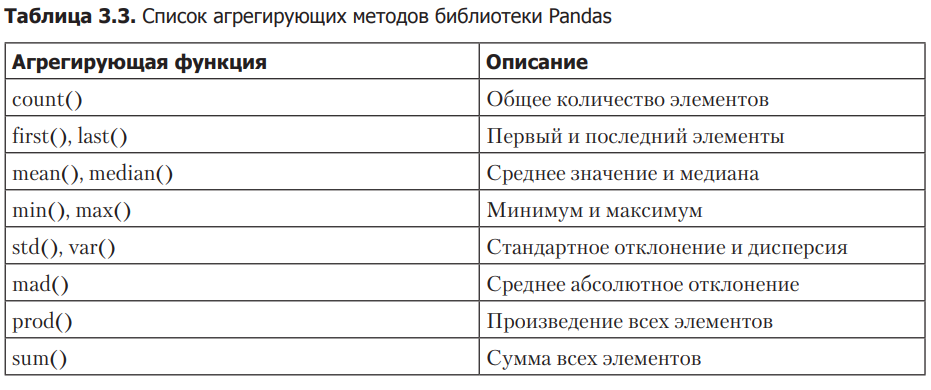

Применение агрегирующей функции к Series возвращает числовое значение, к объекту DataFrame - сводный показатель по каждому столбцу (получить показатели по строкам можно с помощью параметра axis=1):

In [162]:
ser = pd.Series(np.random.randint(1, 10, 6))
ser

0    2
1    6
2    5
3    4
4    3
5    9
dtype: int32

In [163]:
ser.mean()

4.833333333333333

In [164]:
df = pd.DataFrame({'A': np.random.randint(1, 10, 6), 'B': np.random.randint(1, 10, 6)})
df

,A,B
0,8,5
1,2,8
2,1,9
3,1,9
4,3,3
5,7,4


In [165]:
df.sum()

A    22
B    38
dtype: int64

In [166]:
df.sum(axis='columns')

0    13
1    10
2    10
3    10
4     6
5    11
dtype: int64

Можно вывести все базовые сводные показатели DataFrame с помощью метода describe():

In [167]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


#### Операция groupby

Операцию groupby можно предствить в виде трёх шагов: разиение, применение, соединение:
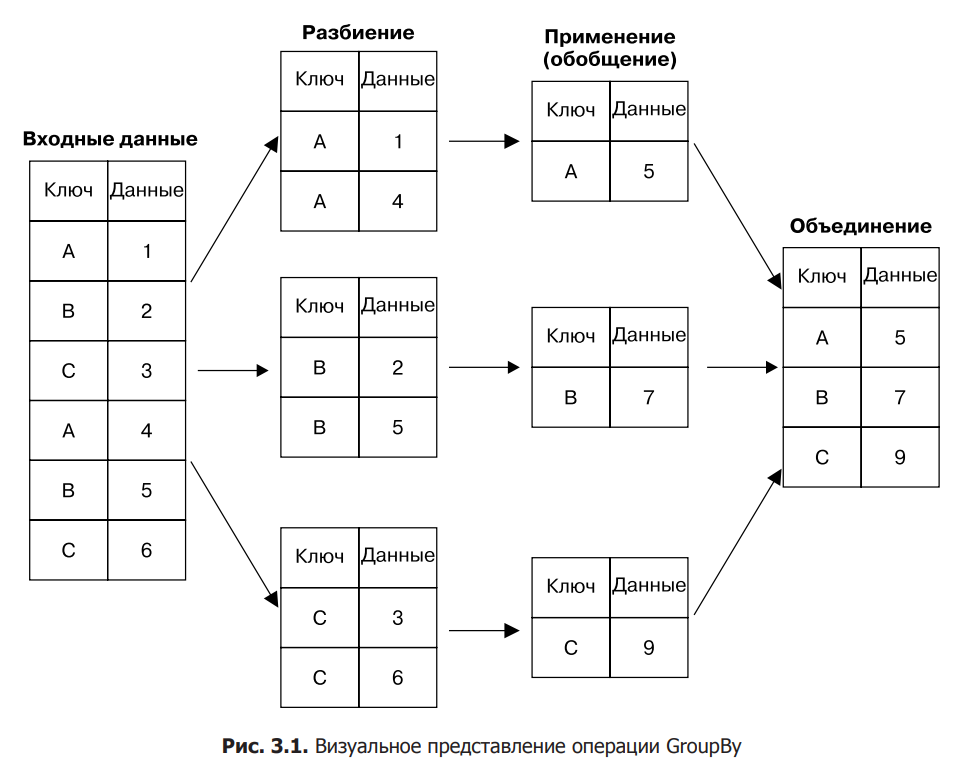

Чтобы получить агргировние по значениям столбца, надо применить к нему операцию groupby и агрегирующую функцию. При чём метод groupby возвращает объект DataFrameGroupBy, которой можно превратить в DataFrame применением любой агрегирущей функции. Таким образом разделяются операции разбиения и применения с объединением.

In [168]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [169]:
gr = df.groupby('key')
gr

In [170]:
gr.count()

,data
key,
A,2
B,2
C,2


Объект groupby содержит все столбцы/строки, сгруппированные по значениям выбранного столбца:

In [171]:
pl_gr = planets.groupby('method')
pl_gr.median()

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,1.0,631.180000,NaN,17.875,2011.5
Eclipse Timing Variations,2.0,4343.500000,5.125,315.360,2010.0
Imaging,1.0,27500.000000,NaN,40.395,2009.0
Microlensing,1.0,3300.000000,NaN,3840.000,2010.0
Orbital Brightness Modulation,2.0,0.342887,NaN,1180.000,2011.0
Pulsar Timing,3.0,66.541900,NaN,1200.000,1994.0
Pulsation Timing Variations,1.0,1170.000000,NaN,NaN,2007.0
Radial Velocity,1.0,360.200000,1.260,40.445,2009.0
Transit,1.0,5.714932,1.470,341.000,2012.0


По объекту groupby можно индексироваться также как и по обычному DataFrame или Series (но без маскирования с использованием объекта groupby, т.к. объект groupby не поддерживает операции сравнения и прихотливой индексации), но чтобы вывести результат, надо также применить агрегирующую функцию:

In [172]:
pl_gr['distance'].median()

method
Astrometry                         17.875
Eclipse Timing Variations         315.360
Imaging                            40.395
Microlensing                     3840.000
Orbital Brightness Modulation    1180.000
Pulsar Timing                    1200.000
Pulsation Timing Variations           NaN
Radial Velocity                    40.445
Transit                           341.000
Transit Timing Variations         855.000
Name: distance, dtype: float64

In [173]:
#pl_gr[pl_gr['distance'] > 40] - '>' not supported between instances of 'SeriesGroupBy' and 'int'

Объекты groupby - итерируемые, т.е. можно итерироваться по группам и их значениям:

In [174]:
for (method, group) in pl_gr:
    print('{0:30} -- {1}'.format(method, group.shape))

Astrometry                     -- (2, 6)
Eclipse Timing Variations      -- (9, 6)
Imaging                        -- (38, 6)
Microlensing                   -- (23, 6)
Orbital Brightness Modulation  -- (3, 6)
Pulsar Timing                  -- (5, 6)
Pulsation Timing Variations    -- (1, 6)
Radial Velocity                -- (553, 6)
Transit                        -- (397, 6)
Transit Timing Variations      -- (4, 6)


Благодаря "магии классов"(цитата из книги, но скорее всего обычное наследование с перегрузкой) все методы, не реализованные явным образом объектом GroupBy, будут передаваться далее и выполняться для групп:

In [175]:
pl_gr['distance'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,17.875000,4.094148,14.98,16.4275,17.875,19.3225,20.77
Eclipse Timing Variations,4.0,315.360000,213.203907,130.72,130.7200,315.360,500.0000,500.00
Imaging,32.0,67.715937,53.736817,7.69,22.1450,40.395,132.6975,165.00
Microlensing,10.0,4144.000000,2076.611556,1760.00,2627.5000,3840.000,4747.5000,7720.00
Orbital Brightness Modulation,2.0,1180.000000,0.000000,1180.00,1180.0000,1180.000,1180.0000,1180.00
Pulsar Timing,1.0,1200.000000,NaN,1200.00,1200.0000,1200.000,1200.0000,1200.00
Pulsation Timing Variations,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Radial Velocity,530.0,51.600208,45.559381,1.35,24.4125,40.445,59.2175,354.00
Transit,224.0,599.298080,913.876990,38.00,200.0000,341.000,650.0000,8500.00


In [176]:
pl_gr.fillna(666)

,number,orbital_period,mass,distance,year
0,1,269.300000,7.10,77.40,2006
1,1,874.774000,2.21,56.95,2008
2,1,763.000000,2.60,19.84,2011
3,1,326.030000,19.40,110.62,2007
4,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...
1030,1,3.941507,666.00,172.00,2006
1031,1,2.615864,666.00,148.00,2007
1032,1,3.191524,666.00,174.00,2007
1033,1,4.125083,666.00,293.00,2008


#### Агрегирование, фильтрация, преобразование, применение

У объектов GroupBy имеются методы aggregate(), filter(), transform() и apply(), эффективно выполняющие операции до объединения сгруппированных данных.

In [177]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6), 'data2': np.random.randint(0, 10, 6)},
                    columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,9
1,B,1,0
2,C,2,9
3,A,3,5
4,B,4,1
5,C,5,0


Метод aggregate() позволяет применить несколько функций агрегирования к объекту groupby и вывести их в одном DataFrame. Применяемые функции можно указывать строковыми названиями, методами или названиями из библиотеки Pandas:

In [178]:
df.groupby('key').aggregate(['max', np.min, sum])

data1          data2         
      max amin sum   max amin sum
key                              
A       3    0   3     9    5  14
B       4    1   5     1    0   1
C       5    2   7     9    0   9

In [179]:
df.groupby('key').aggregate(['max', np.min, sum]).columns #имена колонок в этом случае - мультииндексы

MultiIndex([('data1',  'max'),
            ('data1', 'amin'),
            ('data1',  'sum'),
            ('data2',  'max'),
            ('data2', 'amin'),
            ('data2',  'sum')],
           )

Кроме того, aggregate можно передать словарь с ключами в виде колонок и значениями в виде функций, которые должны быть применены к данным столбцам:

In [180]:
df.groupby('key').aggregate({'data1': [sum, max], 'data2': [min]})

data1     data2
      sum max   min
key                
A       3   3     5
B       5   4     0
C       7   5     0

Для использования функции filter(), необходимо создать фильтрующую функцию, возвращающую маску переданного в неё массива. Такая маска применится к сгруппированным данным, работая как стандартное маскирование:

In [181]:
def filter_func(df):
    return df['data1'].mean() > 3

df.groupby('key').filter(filter_func)

,key,data1,data2
2,C,2,9
5,C,5,0


Метод transform() возвращает DataFrame с данными,к которым была применена функция, принятая в transform как аргумент, при чём функция применяется отдельно для каждой группы:

In [182]:
df.groupby('key').transform(lambda x: x - x.mean()) #центрирование данных относительно среднего значения в каждой групппе

,data1,data2
0,-1.5,2.0
1,-1.5,-0.5
2,-1.5,4.5
3,1.5,-2.0
4,1.5,0.5
5,1.5,-4.5


Метод apply() позволяет применить любую пользовательскую или втроенную функцию к результатам группировки:

In [183]:
def norm_by_data2(x):
    # x –  обязательно объект DataFrame
    x['data1'] /= x['data2'].sum()
    return x

df.groupby('key').apply(norm_by_data2) #нормировка значнений первого столбца относительно суммы значений второго тсолбца по группам

,key,data1,data2
0,A,0.000000,9
1,B,1.000000,0
2,C,0.222222,9
3,A,0.214286,5
4,B,4.000000,1
5,C,0.555556,0


#### Задания нестандартных ключей разбиения

В качетсве ключей разбиения можно указывать не только столбцы, но и другие объекты:

In [184]:
df

,key,data1,data2
0,A,0,9
1,B,1,0
2,C,2,9
3,A,3,5
4,B,4,1
5,C,5,0


1. Список или массив

In [185]:
l = [0, 'a', 0, 'a', 38, 0]
df.groupby(l).sum()

,data1,data2
0,7,18
38,4,1
a,4,5


2. Словарь, задающий соответствие значений индекса и ключей группировки

In [186]:
df2 = df.set_index('key')
mapping = {'A': 'good', 'B': 'not good', 'C': 'not good'}
df2

,data1,data2
key,,
A,0,9
B,1,0
C,2,9
A,3,5
B,4,1
C,5,0


In [187]:
df2.groupby(mapping).sum()

,data1,data2
key,,
good,3,14
not good,12,10


3. Любая функция языка Python

Любая функция, принимающая на входе значение индекса и возвращающая группу:

In [188]:
def distribution(x):
    if x == 'A' or x == 'B':
        return 'ABidx'
    else:
        return 'Cidx'
    
df2.groupby(distribution).sum()

,data1,data2
key,,
ABidx,8,15
Cidx,7,9


4. Любая комбинация вышеперечисленных

In [189]:
df2.groupby([mapping, distribution]).sum()

data1  data2
key      key                
good     ABidx      3     14
not good ABidx      5      1
         Cidx       7      9

In [190]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


### Сводные таблицы

Сводные таблицы предаставляют возможность упрощённого синтаксиса группировки, в том числе по нескольким колонкам и индексам. Автор книги советует рассматривать их как многомерную операцию groupby. 

Запишем пример операции groupby и аналогичной операции, но с помощью сводной таблицы (pivot_table)

In [191]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Рассморим зависимость выживаемости от разных факторов:

In [192]:
titanic.groupby('sex')['survived'].mean() #зависимость выживаемости от пола

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [193]:
titanic.groupby(['sex', 'pclass'])['survived'].mean() #зависимость от пола и класса

sex     pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: survived, dtype: float64

In [194]:
titanic.groupby(['sex', 'pclass'])['survived'].mean().unstack() #более удобное представление

pclass,1,2,3
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Такой код выглядит запутанно и длинно. Такого же результата можно добить при помощи сводной таблицы:

In [195]:
titanic.pivot_table('survived', index='sex', columns='pclass')

pclass,1,2,3
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Можно задавать несколько колонок для индекса и колонок результирующей сводной таблицы:

In [196]:
age = pd.cut(titanic['age'], [0, 18, 80]) #разбиение исходных данных по возрасту
age

0      (18.0, 80.0]
1      (18.0, 80.0]
2      (18.0, 80.0]
3      (18.0, 80.0]
4      (18.0, 80.0]
           ...     
886    (18.0, 80.0]
887    (18.0, 80.0]
888             NaN
889    (18.0, 80.0]
890    (18.0, 80.0]
Name: age, Length: 891, dtype: category
Categories (2, interval[int64, right]): [(0, 18] < (18, 80]]

In [197]:
titanic.pivot_table('survived', index=['sex', age], columns='pclass')

pclass                  1         2         3
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [198]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', index=['sex', age], columns=['pclass', fare]) #зависимость и от возраста и пола и от класса и стоимости билета

pclass                         1                                  2  \
fare            (-0.001, 14.454] (14.454, 512.329] (-0.001, 14.454]   
sex    age                                                            
female (0, 18]               NaN          0.909091         1.000000   
       (18, 80]              NaN          0.972973         0.880000   
male   (0, 18]               NaN          0.800000         0.000000   
       (18, 80]              0.0          0.391304         0.098039   

pclass                                           3                    
fare            (14.454, 512.329] (-0.001, 14.454] (14.454, 512.329]  
sex    age                                                            
female (0, 18]           1.000000         0.714286          0.318182  
       (18, 80]          0.914286         0.444444          0.391304  
male   (0, 18]           0.818182         0.260870          0.178571  
       (18, 80]          0.030303         0.125000          0.192308

#### Параметры функции pivot_table

Помимо уже использованных параметор, функции можно указать параметры dropna и fill_na, работающие стандартным образом.

Можно передать любую агрегирующую функцию (по умолчанию всегда вычисляет среднее) и даже указать для различных показателей разные агрегирующие функции, передав столбец и функцию в виде словаря:

In [199]:
titanic.pivot_table('survived', index=['sex', age], columns='pclass', aggfunc='sum')

pclass            1   2   3
sex    age                 
female (0, 18]   10  14  22
       (18, 80]  72  54  25
male   (0, 18]    4   9  11
       (18, 80]  36   6  27

In [200]:
titanic.pivot_table(index=['sex', age], columns='pclass', aggfunc={'survived': ['sum', 'mean'], 'fare': 'mean'})

fare                        survived            \
                       mean                            mean             
pclass                    1          2          3         1         2   
sex    age                                                              
female (0, 18]   127.474245  25.064286  17.370835  0.909091  1.000000   
       (18, 80]  105.043469  21.224653  14.785453  0.972973  0.900000   
male   (0, 18]   114.638320  26.116947  20.639055  0.800000  0.600000   
       (18, 80]   68.877389  20.219593  10.022624  0.375000  0.071429   

                                       
                          sum          
pclass                  3   1   2   3  
sex    age                             
female (0, 18]   0.511628  10  14  22  
       (18, 80]  0.423729  72  54  25  
male   (0, 18]   0.215686   4   9  11  
       (18, 80]  0.133663  36   6  27

Также можно вывести сводные показатели по всей группе, для этого есть параметр margins и для задания имени получающегося столбца параметр margins_name:

In [201]:
titanic.pivot_table('survived', index='sex', columns='pclass', aggfunc='sum', margins=True, margins_name='result') 

pclass,1,2,3,result
sex,,,,
female,91,70,72,233
male,45,17,47,109
result,136,87,119,342


In [202]:
#titanic.pivot_table('survived', index=['sex', age], columns='pclass', aggfunc='sum', margins=True, margins_name='result') 
#ОШИБКА!!! margins не работает, если в результате получается мультииндексированный объект!!!

### Векторизированные операции над строками

Почти всегда реальные данные обладают неточностями, отсутствующими данными, неправильным форматом данных. Особенно это касается строковых данных. Из этого следует, что необходим быстрый и удобный способ обрабатывать строковые данные примерно так, как это делает библиотека NumPy с числами. Для этой цели были созданы векторизированные операции над строками, предоставляющие инструмент по работе над большими массивами строк.

Для вызова векторизированной операции над строками необходимо указать атрибут str и название функции нужного объекта Series:

In [203]:
ser = pd.Series(['peter', 'Paul', 'MARY', 'gUIDO'])
ser

0    peter
1     Paul
2     MARY
3    gUIDO
dtype: object

In [204]:
ser.str.capitalize()

0    Peter
1     Paul
2     Mary
3    Guido
dtype: object

Подобным образом можно вызывать множество методов, имеющих такие же названия как в стандартной библиотеке Python:
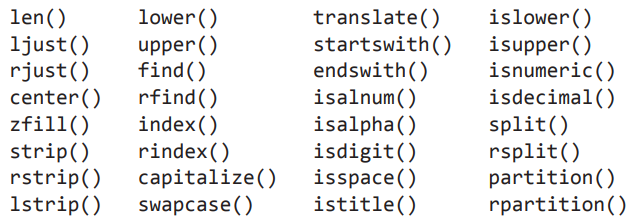

In [205]:
ser.str.len()

0    5
1    4
2    4
3    5
dtype: int64

Также есть группа методов, поддерживающих регулярные выражения:
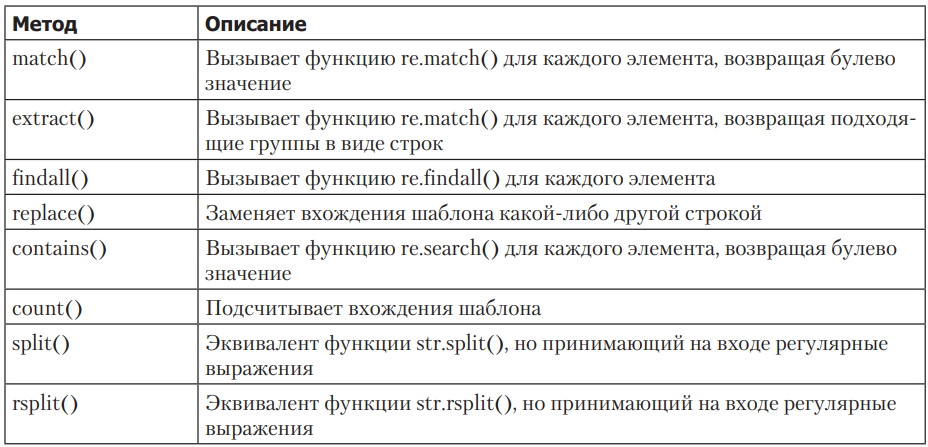

In [206]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam', 'Eric Idle', 'Terry Jones', 'Michael Palin'])
monte

0    Graham Chapman
1       John Cleese
2     Terry Gilliam
3         Eric Idle
4       Terry Jones
5     Michael Palin
dtype: object

In [207]:
monte.str.extract('([A-Za-z]+)') #интересно, что возвращает DataFrame

,0
0,Graham
1,John
2,Terry
3,Eric
4,Terry
5,Michael


In [208]:
monte.str.match('([A-Za-z]+)')

0    True
1    True
2    True
3    True
4    True
5    True
dtype: bool

In [209]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$') #оканчивается на согласную

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

И есть ещё группа методов для работы со строками в Pandas:
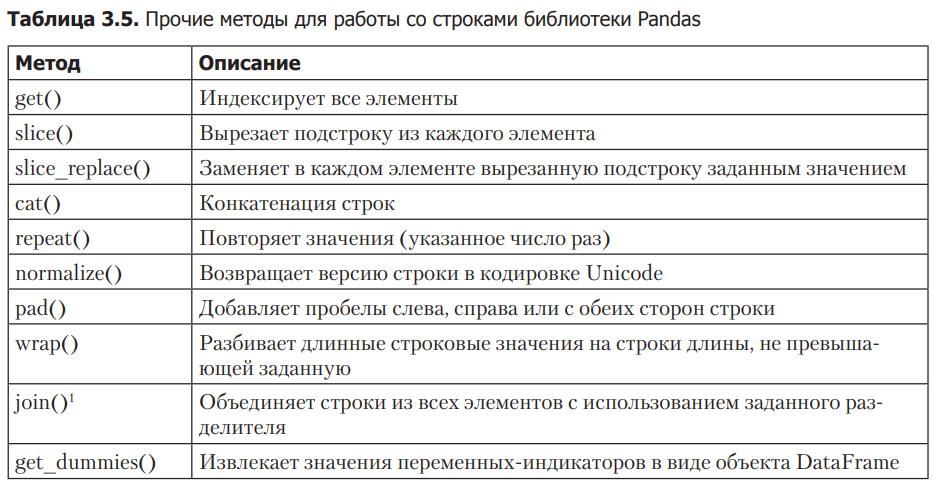

In [210]:
monte.str.get(-1) #получить последний символ каждой строки

0    n
1    e
2    m
3    e
4    s
5    n
dtype: object

In [211]:
monte.str[1] #скрытый вызов метода get

0    r
1    o
2    e
3    r
4    e
5    i
dtype: object

In [212]:
monte.str.slice(1, 4) #срез

0    rah
1    ohn
2    err
3    ric
4    err
5    ich
dtype: object

In [213]:
monte.str[0:5] #синтаксис скрытого вызова метода slice

0    Graha
1    John 
2    Terry
3    Eric 
4    Terry
5    Micha
dtype: object

In [214]:
monte.str.wrap(4) #конец помечает \n

0    Grah\nam C\nhapm\nan
1          John\nClee\nse
2     Terr\ny Gi\nllia\nm
3              Eric\nIdle
4         Terr\ny Jo\nnes
5     Mich\nael \nPali\nn
dtype: object

Пусть есть набор данных, содержащий информацию в виде кодов, таких как A="родился в США", B="родился в Великобритании", C="любит сыр", D="любит мясные консервы":

In [215]:
full_monte = pd.DataFrame({'name': monte, 'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C', 'B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [216]:
full_monte['info'].str.get_dummies('|') #разбить все индикаторные переменные, преобразовав их в объект DataFrame

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


### Временные ряды

Есть много типов данных для представления даты и времени, встроенных в Python и в библиотеку NumPy. У каждого есть свои плюсы и минусы, подробнее об этом можно почитать в книге.

В библиотеке Pandas основным типом данных для даты и времени является TimeStamp, несколько объектов которого можно преобразовать в тип DatetimeIndex, который можно использовать для индексации DataFrame и Series. 

In [217]:
date = pd.to_datetime('30th July 2023')
date

Timestamp('2023-07-30 00:00:00')

In [218]:
idx = pd.DatetimeIndex(['30th July 2023', '29th July 2023'])
idx

DatetimeIndex(['2023-07-30', '2023-07-29'], dtype='datetime64[ns]', freq=None)

In [219]:
ser = pd.Series(['sunday', 'saturday'], index=idx)
ser

2023-07-30      sunday
2023-07-29    saturday
dtype: object

Тип TimeStamp удобно адаптирован под многие операции над датой и даже способен производить векторизованные операции над ними:

In [220]:
date.strftime('%A')

'Sunday'

In [221]:
date + pd.to_timedelta(np.arange(4), 'D')

DatetimeIndex(['2023-07-30', '2023-07-31', '2023-08-01', '2023-08-02'], dtype='datetime64[ns]', freq=None)

In [222]:
date + pd.to_timedelta(np.arange(4), 'W')

DatetimeIndex(['2023-07-30', '2023-08-06', '2023-08-13', '2023-08-20'], dtype='datetime64[ns]', freq=None)

Временные данные можно очень удобно использовать в качестве индекса и индексироваться по ним:

In [223]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [224]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [225]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

#### Структуры данных для временных рядов

 Для меток даты/времени библиотека Pandas предоставляет тип данных Timestamp.
Этот тип является заменой для нативного типа данных datetime языка Python, он
основан на более эффективном типе данных numpy.datetime64. Соответствующая
индексная конструкция — DatetimeIndex.


 Для периодов времени библиотека Pandas предоставляет тип данных Period.
Этот тип на основе типа данных numpy.datetime64 кодирует интервал времени
фиксированной периодичности. Соответствующая индексная конструкция —
PeriodIndex.


 Для временных дельт (продолжительностей) библиотека Pandas предоставляет
тип данных Timedelta. Timedelta — основанная на типе numpy.timedelta64 более
эффективная замена нативного типа данных datetime.timedelta языка Python.
Соответствующая индексная конструкция — TimedeltaIndex.

Для преобразования строк и других объектов в TimeStamp используется функция pd.to_datetime(), возвращающая индекс дат при передаче ей списка значений:

In [226]:
from datetime import datetime
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015', '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

Любой DatetimeIndex можно преобразовать в PeriodIndex путём метода to_period() с указанием длительности периодов:

In [227]:
per = dates.to_period('W')
per

PeriodIndex(['2015-06-29/2015-07-05', '2015-06-29/2015-07-05',
             '2015-07-06/2015-07-12', '2015-07-06/2015-07-12',
             '2015-07-06/2015-07-12'],
            dtype='period[W-SUN]')

In [228]:
pd.to_datetime('2015-07-08') in per

True

Объект TimedeltaIndex создается, например, при вычитании одной даты из другой:

In [229]:
dates - dates[1]

TimedeltaIndex(['-1 days', '0 days', '2 days', '3 days', '4 days'], dtype='timedelta64[ns]', freq=None)

Создавать временные ряды можно при помощи встроенных функций, работающих как np.arange: pd.date_range() — для меток даты/времени, pd.period_range() — для периодов времени и pd.timedelta_range() — для временных дельт. 

In [230]:
pd.date_range('2023-07-30', '2023-08-09', freq='D')

DatetimeIndex(['2023-07-30', '2023-07-31', '2023-08-01', '2023-08-02',
               '2023-08-03', '2023-08-04', '2023-08-05', '2023-08-06',
               '2023-08-07', '2023-08-08', '2023-08-09'],
              dtype='datetime64[ns]', freq='D')

In [231]:
pd.date_range('2023-07-30', freq='W', periods=3)

DatetimeIndex(['2023-07-30', '2023-08-06', '2023-08-13'], dtype='datetime64[ns]', freq='W-SUN')

In [232]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [233]:
pd.period_range('2015-07-01', '2016-07-01', freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
             '2016-07'],
            dtype='period[M]')

In [234]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [235]:
pd.timedelta_range(1000000000, periods=10, freq='T')

TimedeltaIndex(['0 days 00:00:01', '0 days 00:01:01', '0 days 00:02:01',
                '0 days 00:03:01', '0 days 00:04:01', '0 days 00:05:01',
                '0 days 00:06:01', '0 days 00:07:01', '0 days 00:08:01',
                '0 days 00:09:01'],
               dtype='timedelta64[ns]', freq='T')

#### Периодичность дат

Есть множество поддерживаемых периодичностей (соответствуют параметру freq)
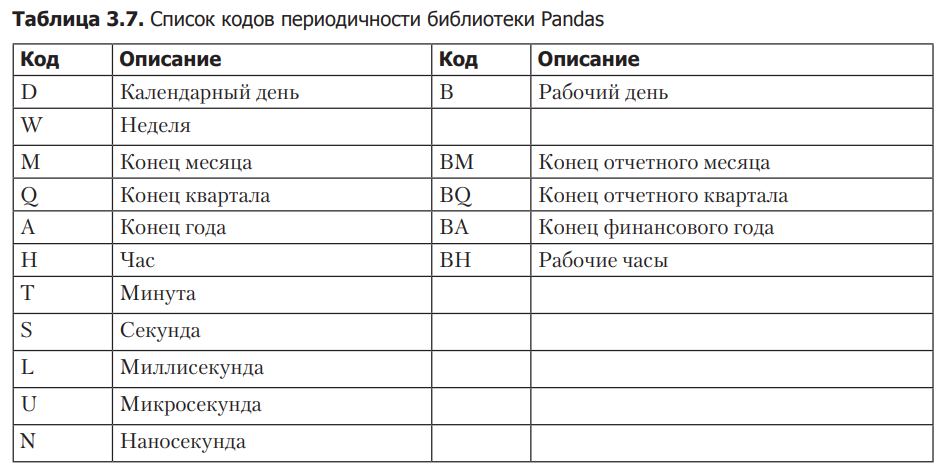

Такие периодичности как квартал, год, месяц определяются их концом. Чтобы определить их их началом, следует приписать букву 'S':

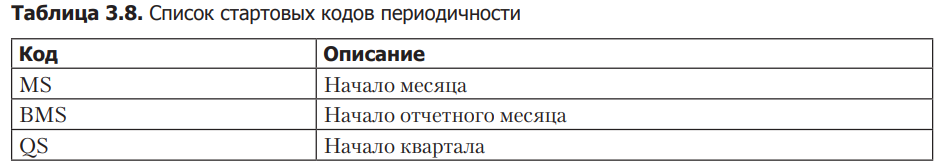
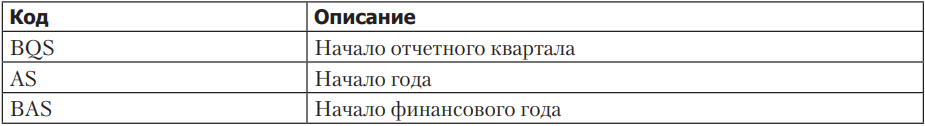

Можно изменить используемый для определения квартала или года месяц, а также день, с которго начинается неделя с помощью добавления в конец кода месяца, состоящего из трех букв:
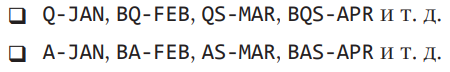
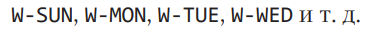

Также можно указывать смешанные периодичности:

In [236]:
pd.timedelta_range(0, periods=9, freq="1D2H30T")

TimedeltaIndex(['0 days 00:00:00', '1 days 02:30:00', '2 days 05:00:00',
                '3 days 07:30:00', '4 days 10:00:00', '5 days 12:30:00',
                '6 days 15:00:00', '7 days 17:30:00', '8 days 20:00:00'],
               dtype='timedelta64[ns]', freq='1590T')

#### Передескретизация временные сдвиги и окна

В этом разделе будут показаны примеры на основе цен акций гугл в некотором временном промежутке. Эти данные можно скачать, как утверждает автор книги, с помощью втроенного функционала библиотеки Pandas, но на деле для этого пришлось организовывать танцы с бубнами и лезть на стек оферфлоу. Также для наглядности будет использоваться библиотека matplotlib, обсуждаемая в главе 4.

In [237]:
!pip install pandas_datareader
!pip install yfinance

import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as wb

In [238]:
symbol = 'GOOG'
data_source='google'
start_date = '2004-01-01'
end_date = '2016-12-31'
goog = wb.get_data_yahoo(symbol, start_date, end_date)
goog.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


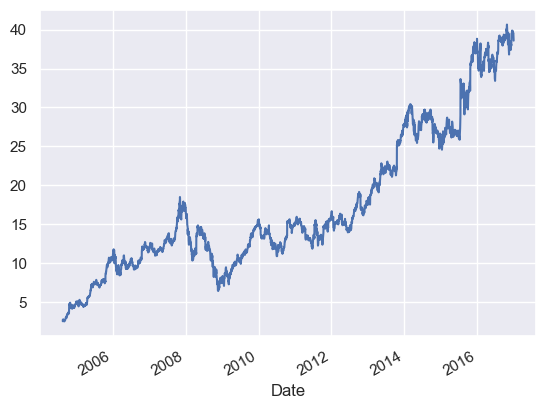

In [239]:
goog = goog['Close']

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

goog.plot();

#### Передескретизация временных данных

Часто бывает необходимо изменить периодичность интервалов, с которыми рассматривались данные. Для этого есть 2 метода: resample() и freq(). Разница между ними состоит в том, что метод resample выполняет агрегирование данных, а freq выполняет выборку. Например при понижающей передискретизации до периода в год будут выполнены разные действия:

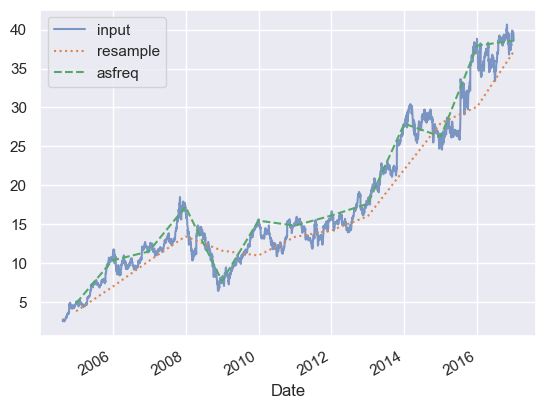

In [240]:
goog.plot(alpha=0.7, style='-')
goog.resample('BA').mean().plot(style=':') #считает среднее значение за год
goog.asfreq('BA').plot(style='--')  #выбирает последние данные в году
plt.legend(['input', 'resample', 'asfreq'], loc='upper left');

При повышающей дискретизации методы ведут себя практически индентично. Они оставляют NA значения на месте пропущенных данных, но допускают параметры fill_na и method, заполняющие эти значения. Например при повышающей дескретизации с периодом в день (до этого период был по рабочим дням):

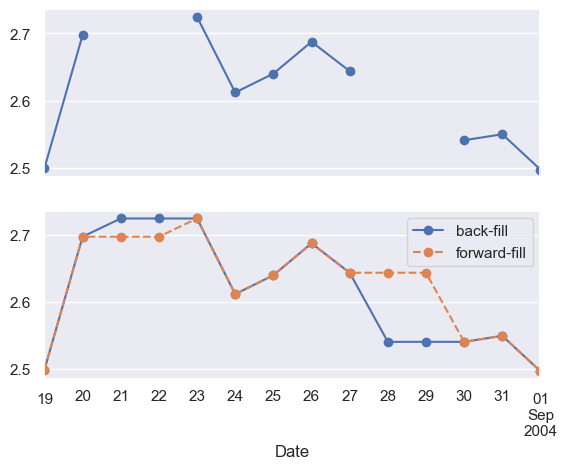

In [241]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

#### Временные сдвиги

Для сдвига данных на определённое количество периодов дексретизации (данные могут сдвигаться только на кратные периоду дескретизации промежутки), есть 2 метода shift() и thift(). Разница состоит в том, что shift сдвигает значения данных, а thift сдвигает значение индекса:

C:\Users\boris\AppData\Local\Temp\ipykernel_19816\3268442953.py:6: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  goog.tshift(900).plot(ax=ax[2])


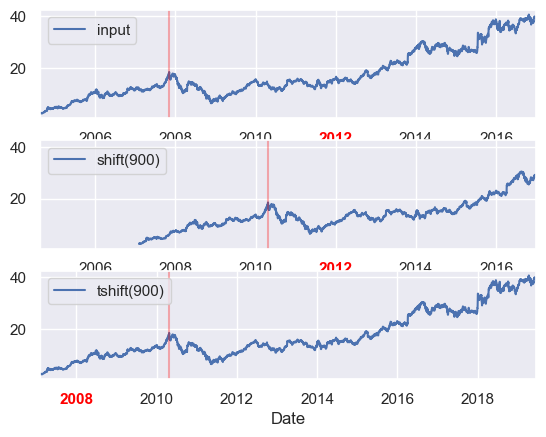

In [242]:
fig, ax = plt.subplots(3, sharey=True)
 # задаем периодичность данных
goog = goog.asfreq('D', method='pad')
goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])
 # Легенды и пояснения
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')
ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')
ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')
ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

Из графиков видно, что shift сдвигает данные и выводит их за пределы графика, а thift сдвигает оси.

#### Скользящие окна

Скользящие окна - аналог операции groupby для временных рядов. Для скользящего окна выбирается период, кратный дескретизации данных и для каждой временной точки создатся "окно" - набор данных указанной длины (исходная точка в этом наборе может быть посередине или крайней точкой). По этому окну вычисляется сводный показатель и значение помещается в эту точку.

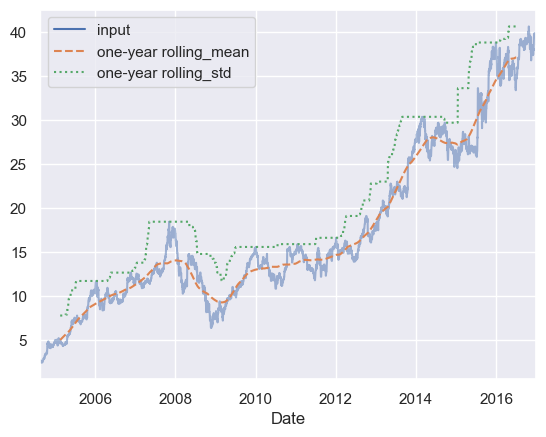

In [243]:
rolling = goog.rolling(365, center=True)
data = pd.DataFrame({'input': goog, 'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.max()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.5)

#### Увеличение производительности библиотеки Pandas

Хотя библиотека Pandas и создавалась на основе быстро работающей библиотеки NumPy и сама своей парадигмой также определяла быструю работу с данными, некоторые функции работают в ней не оптимально. Рассмотрим на примере создания маски для массива:

In [244]:
x = np.random.ranf()
y = np.random.ranf()
x, y

(0.5235331615986629, 0.10928712389191364)

In [245]:
mask = (x > 0.5) & (y < 0.5)

Подобное инициализирование маски равносильно следующему коду:

In [246]:
tmp1 = (x > 0.5)
tmp2 = (y < 0.5)
mask = tmp1 & tmp2

Из этого следует, что выделяется доп. оперативная память и тратится процессорное время на создание временных объектов. Во избежание этого, в библиотеке Pandas есть функции, увеличивающие производительность подобных операций: pd.eval(), pd.query()

In [247]:
%load_ext memory_profiler

nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols)) for i in range(4))

%timeit df1 + df2 + df3 + df4

%memit df1 + df2 + df3 + df4

105 ms ± 11.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
peak memory: 499.20 MiB, increment: 0.09 MiB


Аналогичное вычисление можно сделать с помощью функции pd.eval, передав ей строку выражения:

In [248]:
%timeit pd.eval('df1 + df2 + df3 + df4')

%memit pd.eval('df1 + df2 + df3 + df4')

49.3 ms ± 3.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
peak memory: 499.21 MiB, increment: 0.00 MiB


pd.eval() отработала в 2 раза быстрее, однако автор утверждает, что она должна использовать намного меньше памяти, что не так судя по отчётам.

In [249]:
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (1000,30))) for i in range(5))

#### Функция pd.eval()

pd.eval() умеет вычислять:

1. Арифметические операторы

In [250]:
%timeit (-df1 * df2 / (df3 + df4) - df5)
%memit (-df1 * df2 / (df3 + df4) - df5)


1.27 ms ± 478 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
peak memory: 194.08 MiB, increment: 0.00 MiB


In [251]:
%timeit pd.eval('-df1 * df2 / (df3 + df4) - df5')
%memit pd.eval('-df1 * df2 / (df3 + df4) - df5')

4.83 ms ± 434 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
peak memory: 194.63 MiB, increment: 0.00 MiB


На таком наборе данных pd.eval() мало того, что не даёт преимещуства, но даже уступает на несколько порядков обычному способу!!!

2. Операторы сравнения

In [252]:
%timeit (df1 < df2) & (df2 <= df3) & (df3 != df4)
%memit (df1 < df2) & (df2 <= df3) & (df3 != df4)

865 µs ± 157 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
peak memory: 194.63 MiB, increment: 0.00 MiB


In [253]:
%timeit  pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
%memit  pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')

3.66 ms ± 452 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
peak memory: 194.63 MiB, increment: 0.00 MiB


3. Побитовые операторы

In [254]:
%timeit (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
%memit (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)

1.23 ms ± 505 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
peak memory: 194.63 MiB, increment: 0.00 MiB


In [255]:
%timeit pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
%memit pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')

5.56 ms ± 1.35 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
peak memory: 194.62 MiB, increment: 0.00 MiB


4. Атрибуты объектов и индексы

In [256]:
%timeit df2.T[0] + df3.iloc[1]
%memit df2.T[0] + df3.iloc[1]

813 µs ± 221 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
peak memory: 194.62 MiB, increment: 0.00 MiB


In [257]:
%timeit pd.eval('df2.T[0] + df3.iloc[1]')
%memit pd.eval('df2.T[0] + df3.iloc[1]')

194 ms ± 21.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
peak memory: 196.55 MiB, increment: 0.02 MiB


У объектов DataFrame существует метод eval(), работающий схожим образом с высокоуровневой функцией pd.eval() из библиотеки Pandas. Преимущество метода eval() заключается в возможности ссылаться на столбцы по имени. 

In [258]:
df = pd.DataFrame(rng.rand(100000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.950509,0.700465,0.814343
1,0.868328,0.816091,0.807081
2,0.835187,0.644874,0.286800
3,0.907821,0.737320,0.700303
4,0.389366,0.529910,0.359801


In [259]:
%timeit (df['A'] + df['B']) / (df['C'] - 1) #обычный синтаксис
%timeit pd.eval("(df.A + df.B) / (df.C - 1)") #pd.eval()
%timeit df.eval('(A + B) / (C - 1)') #df.eval()

3.89 ms ± 696 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.06 ms ± 530 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.35 ms ± 1.34 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Метод DataFrame.eval() позволяет выполнять присваивание значения любому из столбцов.

In [260]:
df.eval('D = (A - B) / C', inplace=True)

Аналогично можно модифицировать значения любого уже существующего столбца:

In [261]:
df.eval('D = (A - B) / C', inplace=True)

Метод DataFrame.eval() поддерживает дополнительный синтаксис для работы с локальными переменными языка Python.

In [262]:
column_mean = df.mean(1)
result2 = df.eval('A + @column_mean')

Cимвол @ поддерживается лишь методом DataFrame.eval(), но не функцией pandas.eval(), поскольку у функции pandas.eval() есть доступ только к одному пространству имен (языка Python).

#### DataFrame.query()

Для операций фильтрации можно воспользоваться методом query():

In [263]:
result2 = df.query('A < 0.01 and B < 0.001')
result2

,A,B,C,D
44453,0.008089,0.000354,0.623136,0.012412


#### Когда использовать eval() и query()

Если размер временных объектов DataFrame существенен по сравнению с доступной оперативной памятью вашей системы (обычно несколько гигабайтов), то будет разумно воспользоваться выражениями eval() или query().

In [264]:
states.count?